In [8]:
from google.colab import files

In [9]:
data = files.upload()

Saving Dataset.xlsx to Dataset (1).xlsx


In [12]:
ls

'Dataset (1).xlsx'   Dataset.xlsx   sample_data/


In [13]:
# @title Default title text
import pandas as pd

In [14]:
Customers = pd.read_excel('Dataset.xlsx',sheet_name='Customers')

In [15]:
Dealers = pd.read_excel('Dataset.xlsx',sheet_name='Dealers')


In [16]:
Claims = pd.read_excel('Dataset.xlsx',sheet_name='Claims')

In [17]:
Parts = pd.read_excel('Dataset.xlsx',sheet_name='Parts')

In [18]:
Transactions = pd.read_excel('Dataset.xlsx',sheet_name='Transactions')

In [19]:
Vendors = pd.read_excel('Dataset.xlsx',sheet_name='Vendors')

In [20]:
Customers.head()

,Cust_ID,Cust_Name,Dealer_ID,Country,State,City,ZipCode
0,101,pushpak,1,ind,goa,panaji,402201
1,102,raj,3,ind,karnataka,banglore,403315
2,103,ranbir,4,ind,gujrat,ahemadabad,326665
3,104,reyansh,5,ind,orrisa,cuttack,543211
4,105,raunak,2,ind,delhi,noida,426232


In [21]:
Dealers.head(6)

,Dealer_ID,Dealer_Name,Dealer_Country,State,City,ZIpCode
0,1,Kenneth Schmitt,india,Goa,Panji,400001
1,2,Owen Mclaughlin,india,Delhi,Naoida,400002
2,3,Donald Repinski,india,Karnataka,Bangalore,400003
3,4,Rachel Oszust,india,Gujrat,Ahemdabad,400004
4,5,Lynn Knapp,india,Orrisa,Cuttack,400005
5,6,Harold Hamff,india,Maharashtra,Mumbai,400006


In [22]:
Claims.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Customer Feedback,Flag
0,1,2020-04-01,36000,5,104,901,rpr,NaN,Positive
1,2,2020-04-01,42000,6,106,902,rplc,NaN,Negative
2,3,2020-04-01,45000,4,103,903,rpr,NaN,NaN
3,4,2020-04-01,56000,3,102,904,rplc,NaN,NaN
4,5,2020-04-01,39000,2,105,905,rpr,NaN,NaN


In [23]:
Transactions.head()

,transaction_id,claim_id,transaction_date,transaction_amount
0,101,1,2020-04-01,36000
1,102,2,2020-04-01,42000
2,103,3,2020-04-01,45000
3,104,4,2020-04-01,56000
4,105,5,2020-04-01,39000


In [24]:
Parts.head(11)

,Part_ID,Part_Name,Manufacturer_ID,Manf_Date
0,901,brake pad,501,1996-08-12
1,902,axle,502,1997-03-03
2,903,tie rod,503,1997-06-13
3,904,differential,504,1997-01-14
4,905,rear suspension,505,1996-08-19
5,906,radiator,506,1997-03-24
6,907,clutch kits,503,1997-05-12
7,908,pressure plates,502,1997-05-20
8,909,flywheels,505,1997-06-29
9,910,torque converters,506,1997-07-17


In [25]:
Vendors.head()

,Vendor_ID,Name,Country,State,City,ZIpCode
0,501,Advik,ind,goa,panaji,400001
1,502,Rudra,ind,delhi,noida,400002
2,503,Aayansh,ind,karnataka,banglore,400003
3,504,Adinew,ind,gujrat,ahemadabad,400004
4,505,Dhruv,ind,orrisa,cuttack,400005


# ***USE CASE 1***

Monthly report of top ten Dealers and parts that has been failed:

We need to generate the list of top ten dealers that are processing the extended warranty of parts and also need to find out the most frequent part’s which are reported as a defective.
The list of top ten dealers helps the company to analyze and understand the performances of dealers.
Monthly report of top ten failed parts helps the company to understand following: a) Quality of the parts b) Pattern of failure c) Mostly reported failed part in the quarter/year
Data visualization libraries like seaborn and matplotlib are used to visualize the data.

In [26]:
Top_ten_dealers=Claims.groupby('Dealer_ID').count().sort_values('claim_id',ascending=False).join(Dealers[['Dealer_ID','Dealer_Name']]).head(10)

In [27]:
Top_ten_dealers.set_index('Dealer_ID',inplace=True)

In [28]:
x=Claims.groupby('Part_ID').count().sort_values('claim_id',ascending=False)

In [29]:
x.head(10)

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Repair_or_Replace,Customer Feedback,Flag
Part_ID,,,,,,,,
906,4019,4019,4019,4019,4019,4019,0,0
901,3349,3349,3349,3349,3349,3349,0,1
905,3349,3349,3349,3349,3349,3349,0,0
907,3348,3348,3348,3348,3348,3348,0,0
902,2010,2010,2010,2010,2010,2010,0,1
903,2010,2010,2010,2010,2010,2010,0,0
904,2010,2010,2010,2010,2010,2010,0,0


# ***USE_CASE_2***

Predict the parts that may fail according to the location, mileage and age:
- In this case, by analyzing the historical data, we need to predict the parts that can be expected
to fail according to the age, km driven and location of the vehicle.
- This data helps the company to understand the manufacturing requirements of the part i.e.
which part is to be manufactured in what quantity so as to avoid unavailability of the parts
when claim is raised for that part.

In [30]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.2 MB/s eta 0:00:00


In [34]:

import pandas as pd
import numpy as np
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

fake = Faker()

# Assuming 'Claims' DataFrame is already loaded

# Adding new columns to Claims DataFrame
Claims['vehicle_mileage'] = [fake.random_int(min=5000, max=200000) for _ in range(len(Claims))]
Claims['vehicle_age'] = [fake.random_int(min=1, max=20) for _ in range(len(Claims))]

df = Claims.merge(Customers, on='Cust_ID').merge(Parts, on='Part_ID')

# Print the columns of the DataFrame to verify if 'Claim_Date' exists
print(df.columns)

# If 'Claim_Date' is present, proceed with dropping the columns
if 'Claim_Date' in df.columns:
    df.drop(columns=['Cust_Name', 'Claim_Date', 'Customer Feedback', 'Manf_Date'], inplace=True)
else:
    print("Column 'Claim_Date' not found in DataFrame. Skipping drop operation.")
    # If necessary, handle the case where 'Claim_Date' is missing,
    # such as raising an error or using a different column.


# ... rest of the code ...


Index(['claim_id', 'claim_date', 'claim_amount', 'Dealer_ID_x', 'Cust_ID',
       'Part_ID', 'Repair_or_Replace', 'Customer Feedback', 'Flag',
       'vehicle_mileage', 'vehicle_age', 'Cust_Name', 'Dealer_ID_y', 'Country',
       'State', 'City', 'ZipCode', 'Part_Name', 'Manufacturer_ID',
       'Manf_Date'],
      dtype='object')
Column 'Claim_Date' not found in DataFrame. Skipping drop operation.


# ***USE_CASE_3***

To determine whether the defective part is to be replaced or repaired:
- The model was developed to decide whether the failed part has to be repaired or replaced with
the new one.
- For this, we had the last claimed data of the company.
- As this is the binary classification problem, Decision tree and Random Forest algorithms are
used to build the model.

In [35]:
Claims.head(10)

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Customer Feedback,Flag,vehicle_mileage,vehicle_age
0,1,2020-04-01,36000,5,104,901,rpr,NaN,Positive,88623,12
1,2,2020-04-01,42000,6,106,902,rplc,NaN,Negative,87689,15
2,3,2020-04-01,45000,4,103,903,rpr,NaN,NaN,40615,5
3,4,2020-04-01,56000,3,102,904,rplc,NaN,NaN,78163,4
4,5,2020-04-01,39000,2,105,905,rpr,NaN,NaN,142970,12
5,6,2020-04-01,48000,1,101,906,rplc,NaN,NaN,88953,12
6,7,2020-04-01,53000,5,110,901,rplc,NaN,NaN,9917,18
7,8,2020-04-01,59000,4,124,903,rplc,NaN,NaN,81181,4
8,9,2020-04-01,25000,6,109,906,rpr,NaN,NaN,78557,7
9,10,2020-04-01,29000,3,115,907,rplc,NaN,NaN,193867,16


In [36]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




df = Claims


df['Customer Feedback'].fillna('Neutral', inplace=True)


df['claim_date'] = pd.to_datetime(df['claim_date'])
df['year'] = df['claim_date'].dt.year
df['month'] = df['claim_date'].dt.month


df.drop('claim_date', axis=1, inplace=True)

label_encoder = LabelEncoder()
df['Repair_or_Replace'] = label_encoder.fit_transform(df['Repair_or_Replace'])  # rpr=0, rplc=1


df['Customer Feedback'] = label_encoder.fit_transform(df['Customer Feedback'])
df['Flag'].fillna('Neutral', inplace=True)  # Handling missing values in 'Flag'
df['Flag'] = label_encoder.fit_transform(df['Flag'])


X = df.drop(columns=['claim_id', 'Repair_or_Replace'])  # Features
y = df['Repair_or_Replace']  # Target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)


random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)


accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_forest = accuracy_score(y_test, y_pred_forest)

print(f"Decision Tree Accuracy: {accuracy_tree * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_forest * 100:.2f}%")


<ipython-input-36-0b797f04c87d>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer Feedback'].fillna('Neutral', inplace=True)
<ipython-input-36-0b797f04c87d>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Neutral' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Customer Feedback'].fillna('Neutral', inplace=True)
<ipython-input-36-0b797f04c87d>:29: FutureWarning: A value is trying to b

Decision Tree Accuracy: 100.00%
Random Forest Accuracy: 100.00%


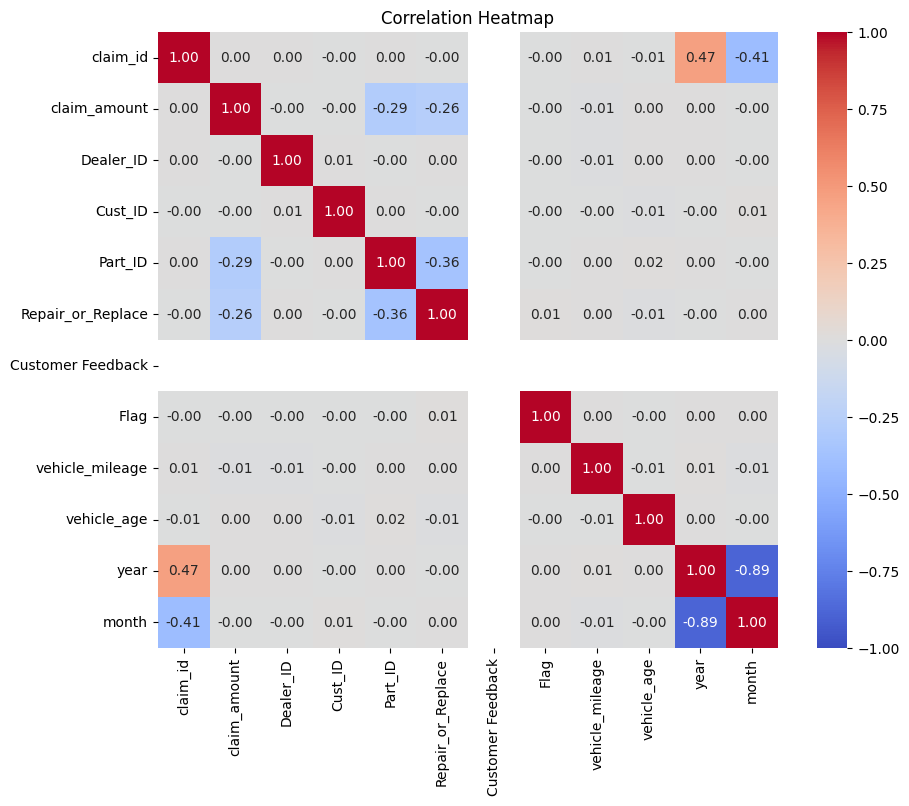

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [38]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_forest = accuracy_score(y_test, y_pred_forest)

print(f"Decision Tree Accuracy: {accuracy_tree * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_forest * 100:.2f}%")


Decision Tree Accuracy: 100.00%
Random Forest Accuracy: 100.00%


# ***USE_CASE_4***

Customer Retention Model:
- This model helps the company to understand the service provided by the dealers is satisfactory
or not.
- The model analyses the performance of the dealers by considering the customers feedback,
churn rate of that location, preference to the other locations by the customers, change of base
location etc.
- The model helps the company to take some regulatory decisions based the performance of
dealer.
- It also helps the company to decide, whether to introduce new schemes, offers etc. to the
affected location or to change the dealer.

In [39]:
df = pd.merge(Claims,Customers)

In [40]:
pip install faker

In [41]:
import numpy as np
from faker import Faker

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


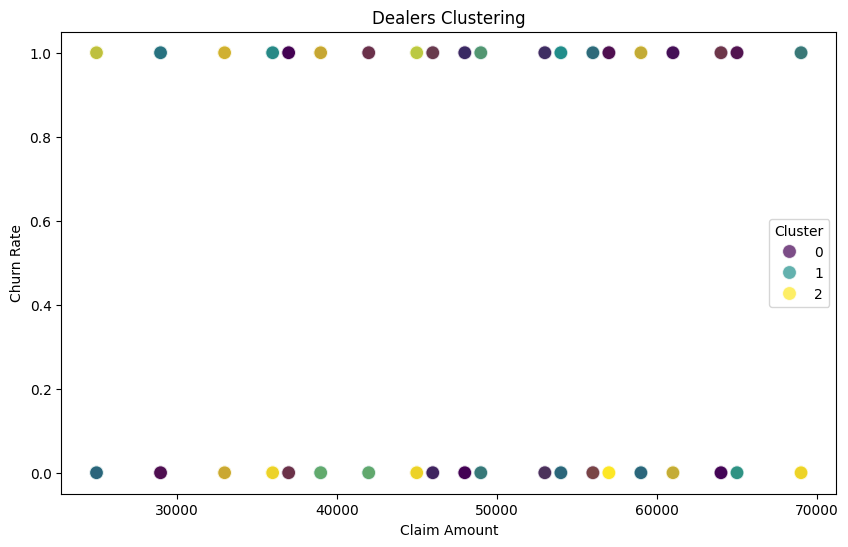

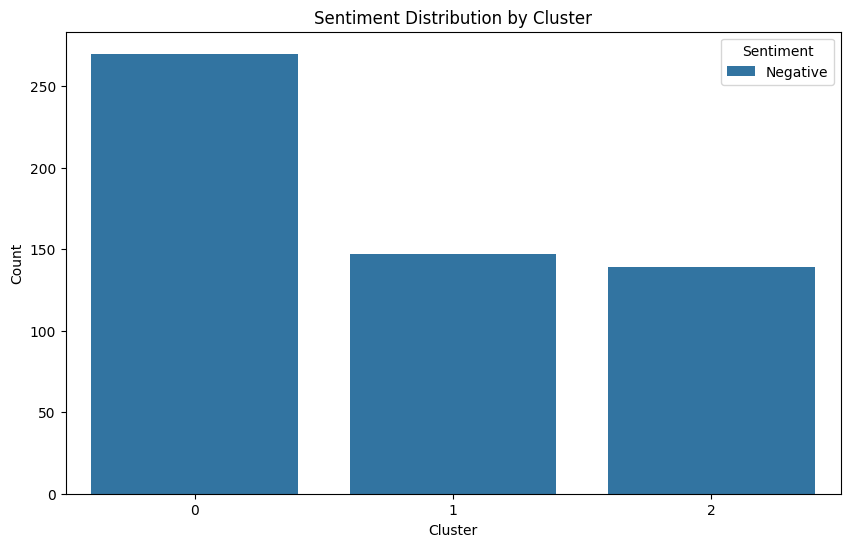

In [42]:
import pandas as pd
import numpy as np
from faker import Faker
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer




fake = Faker()
np.random.seed(42)


df['Churn_Rate'] = np.random.randint(0, 2, size=len(df))
df['Location_Preferences'] = np.random.randint(0, 2, size=len(df))
df['Base_Location_Changes'] = np.random.randint(0, 2, size=len(df))

df['Customer Feedback'] = df['Customer Feedback'].fillna(fake.text(max_nb_chars=100)).astype(str)

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Customer Feedback'].apply(lambda x: 'Positive' if sid.polarity_scores(x)['compound'] > 0 else 'Negative')


features = df[['claim_amount', 'Churn_Rate', 'Location_Preferences', 'Base_Location_Changes']]
X = StandardScaler().fit_transform(features)


kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['claim_amount'], y=df['Churn_Rate'], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Dealers Clustering')
plt.xlabel('Claim Amount')
plt.ylabel('Churn Rate')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Sentiment', data=df)
plt.title('Sentiment Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

df.to_csv('updated_customer_retention_data.csv', index=False)


# ***USE_CASE_5***

Processing of variety of data:
- The data were coming from various locations like US, Canada, China, India in huge amount
with varying data-types.
- It was required to club the data and then process it further for the analyzing.


In [45]:
import pandas as pd
import numpy as np
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

fake = Faker()

# Assuming 'Claims' DataFrame is already loaded

# Adding new columns to Claims DataFrame
Claims['vehicle_mileage'] = [fake.random_int(min=5000, max=200000) for _ in range(len(Claims))]
Claims['vehicle_age'] = [fake.random_int(min=1, max=20) for _ in range(len(Claims))]

df = Claims.merge(Customers, on='Cust_ID').merge(Parts, on='Part_ID')

# Print the columns of the DataFrame to verify if 'Claim_Date' exists
print(df.columns)

# If 'Claim_Date' is present, proceed with dropping the columns
if 'Claim_Date' in df.columns:
    df.drop(columns=['Cust_Name', 'Claim_Date', 'Customer Feedback', 'Manf_Date'], inplace=True)
else:
    print("Column 'Claim_Date' not found in DataFrame. Skipping drop operation.")
    # If necessary, handle the case where 'Claim_Date' is missing,
    # such as raising an error or using a different column.


# ... rest of the code ...


Index(['claim_id', 'claim_amount', 'Dealer_ID_x', 'Cust_ID', 'Part_ID',
       'Repair_or_Replace', 'Customer Feedback', 'Flag', 'vehicle_mileage',
       'vehicle_age', 'year', 'month', 'Cust_Name', 'Dealer_ID_y', 'Country',
       'State', 'City', 'ZipCode', 'Part_Name', 'Manufacturer_ID',
       'Manf_Date'],
      dtype='object')
Column 'Claim_Date' not found in DataFrame. Skipping drop operation.
